# Trabajo práctico integrador

<center><img src="img1.png" width='300'></center>

## Análisis exploratorio

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
df = pd.read_csv('exams.csv')
df.head(5)

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0


In [3]:
# Informe estadístico
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [4]:
# Revisar tipos de datos
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

In [5]:
# Contar duplicados
print(f'Original: {df.id.count()} filas')
df_duplicados = df[df.duplicated()]
print(f'Duplicados: {df_duplicados.id.count()} filas')

Original: 1018 filas
Duplicados: 18 filas


In [6]:
# Eliminar duplicados
df= df.drop_duplicates()
print(df.id.count())

1000


In [7]:
# Eliminar columnas irrelevantes
#print(df.columns) 
df= df.drop(('id'), axis=1)

In [8]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [9]:
# Renombras la columnas
df = df.rename(columns = {
    'gender': 'Gender',
    'race/ethnicity': 'Ethnicity',
    'parental level of education' : 'Parental level of education',
    'lunch' : 'Lunch',
    'employed' : 'Employed',
    'test preparation course' : 'Test preparation course',
    'math score' : 'Math score',
    'physics score' : 'Physics score',
    'chemistry score' : 'Chemistry score',
    'algebra_score' : 'Algebra score'
})
print(df.columns)

Index(['Gender', 'Ethnicity', 'Parental level of education', 'Lunch',
       'Employed', 'Test preparation course', 'Math score', 'Physics score',
       'Chemistry score', 'Algebra score'],
      dtype='object')


In [10]:
# Observar valores nulos
print(df.isnull().sum())

Gender                         0
Ethnicity                      0
Parental level of education    0
Lunch                          0
Employed                       0
Test preparation course        0
Math score                     7
Physics score                  7
Chemistry score                7
Algebra score                  7
dtype: int64


In [11]:
# Eliminar valores nulos
df = df.dropna()
#print(df.isnull().sum())

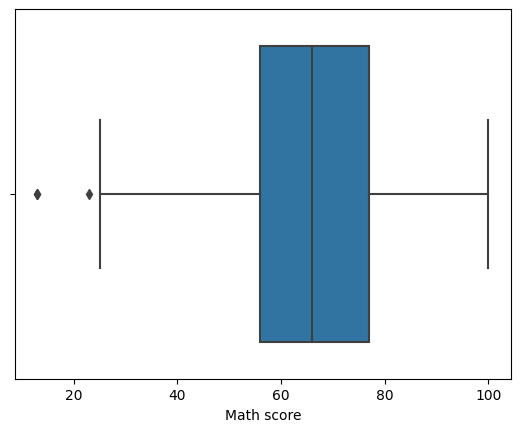

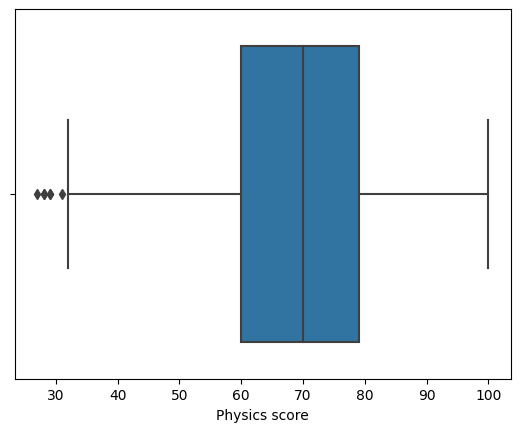

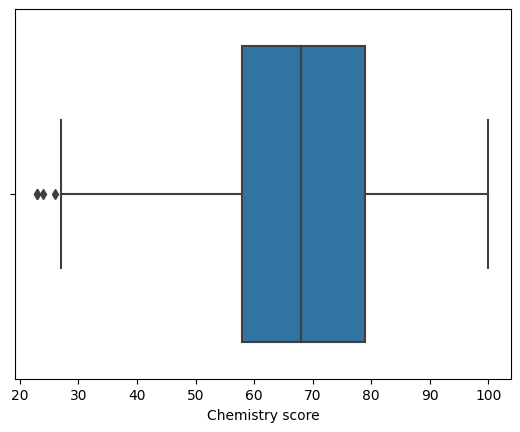

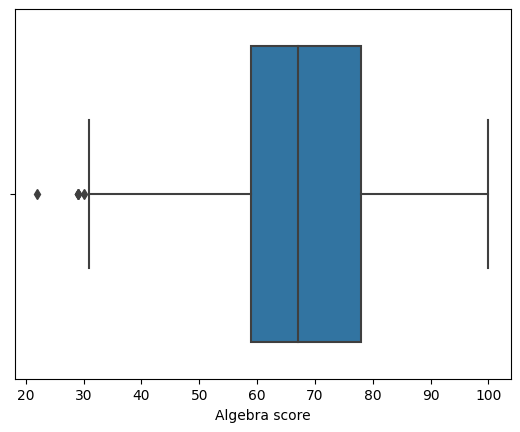

In [12]:
# Detectar los outliers
sns.boxplot(x=df['Math score'])
plt.show()
sns.boxplot(x=df['Physics score'])
plt.show()
sns.boxplot(x=df['Chemistry score'])
plt.show()
sns.boxplot(x=df['Algebra score'])
plt.show()

In [13]:
print(f'Antes: {df.Lunch.count()} filas\n')
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

df = df[~((df<(q1 - 1.5 * IQR))|(df>(q3 + 1.5 *IQR))).any(axis=1)]
print(f'Despues: {df.Lunch.count()} filas')

Antes: 993 filas

Math score         21.0
Physics score      19.0
Chemistry score    21.0
Algebra score      19.0
dtype: float64
Despues: 984 filas
/tmp/ipykernel_72/1988131574.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(q1 - 1.5 * IQR))|(df>(q3 + 1.5 *IQR))).any(axis=1)]
/tmp/ipykernel_72/1988131574.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(q1 - 1.5 * IQR))|(df>(q3 + 1.5 *IQR))).any(axis=1)]


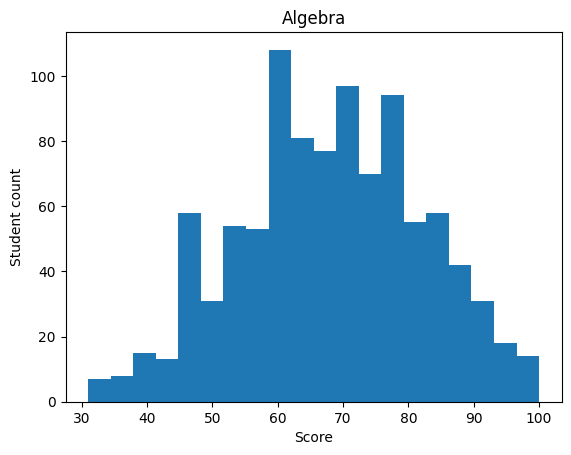

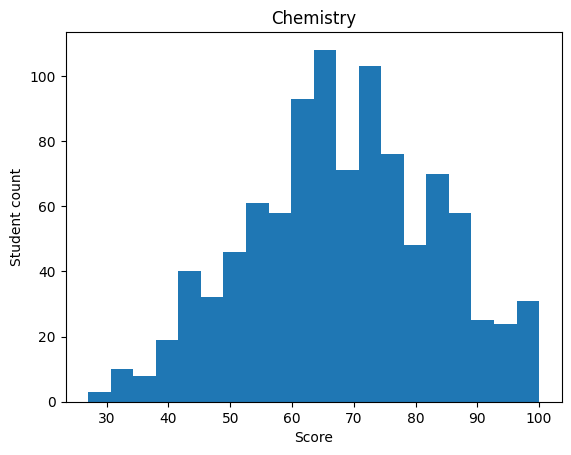

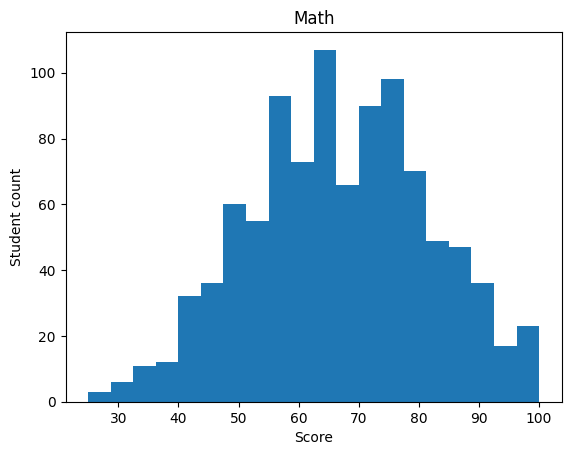

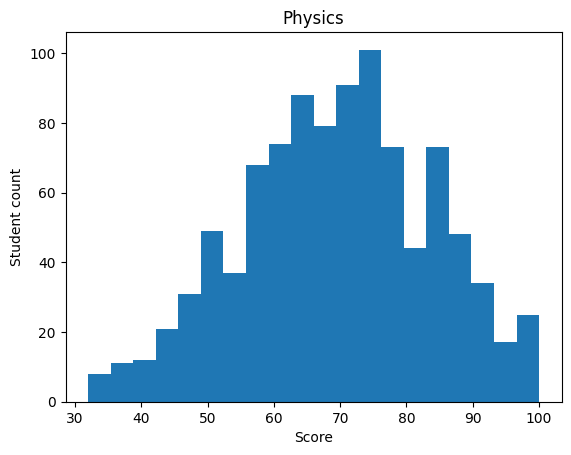

In [17]:
# Encontrar correlaciones (Histogramas)
plt.hist(df['Algebra score'], bins=20)
plt.title('Algebra')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry score'], bins=20)
plt.title('Chemistry')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math score'], bins=20)
plt.title('Math')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics score'], bins=20)
plt.title('Physics')
plt.ylabel('Student count')
plt.xlabel('Score')
plt.show()

In [18]:
# Correlación entre los datos (Mapas de calor)
c = df.corr()
print(c)

                 Math score  Physics score  Chemistry score  Algebra score
Math score         1.000000       0.812055         0.798312       0.916674
Physics score      0.812055       1.000000         0.951536       0.968358
Chemistry score    0.798312       0.951536         1.000000       0.964652
Algebra score      0.916674       0.968358         0.964652       1.000000


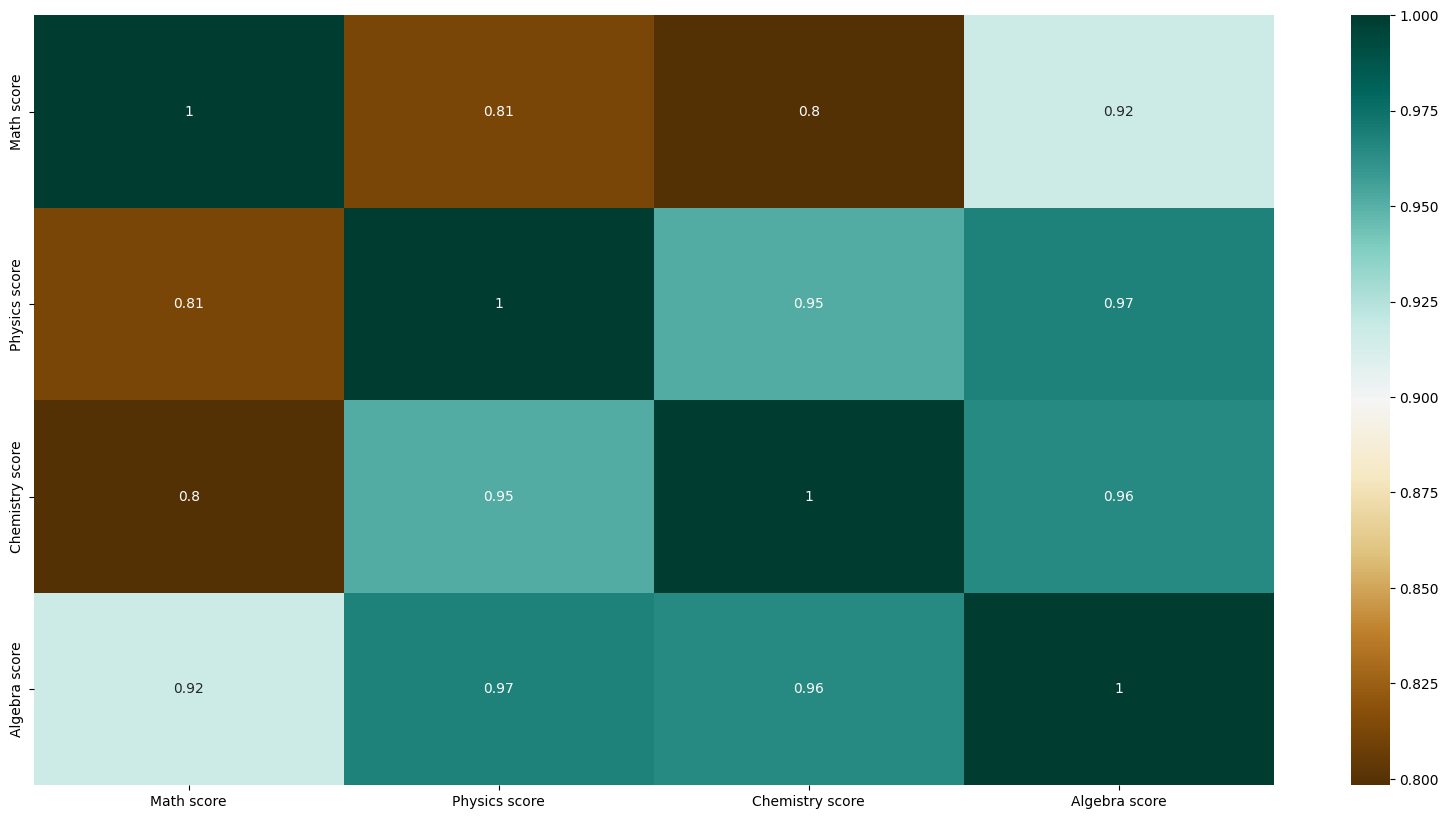

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(c,cmap='BrBG', annot=True)
plt.show()

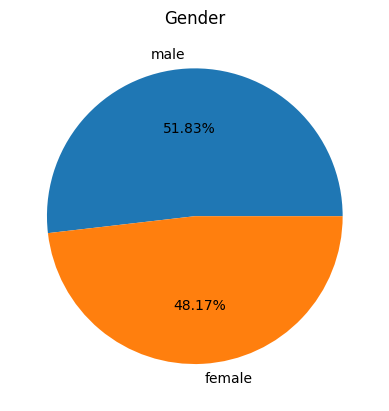

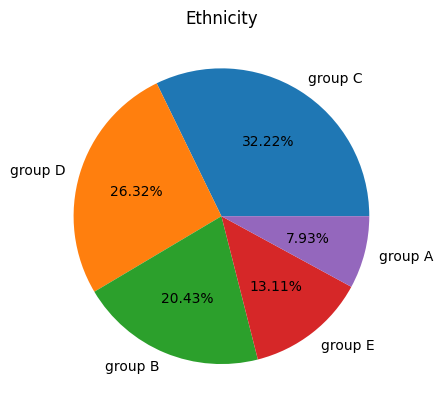

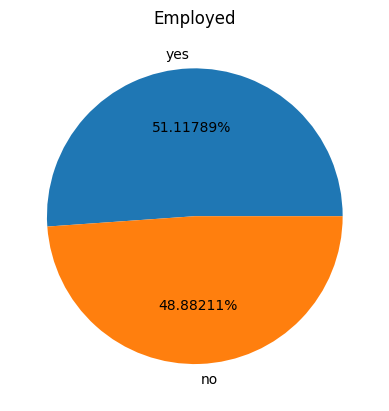

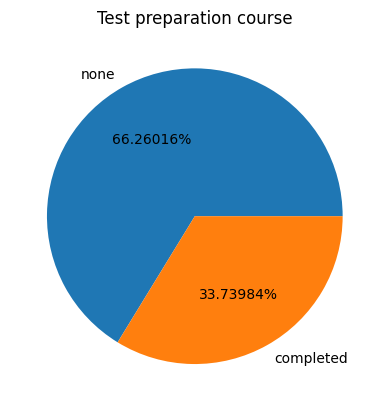

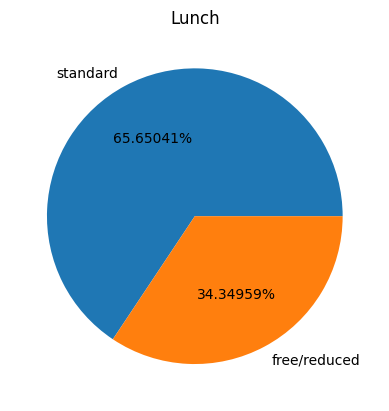

In [29]:
#Gráfico de tortas
labels= df['Gender'].value_counts().index
sizes = df['Gender'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Gender')
plt.show()

labels= df['Ethnicity'].value_counts().index
sizes= df['Ethnicity'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Ethnicity')
plt.show()

labels= df['Employed'].value_counts().index
sizes= df['Employed'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.5f%%')
plt.title('Employed')
plt.show()

labels= df['Test preparation course'].value_counts().index
sizes= df['Test preparation course'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.5f%%')
plt.title('Test preparation course')
plt.show()

labels= df['Lunch'].value_counts().index
sizes= df['Lunch'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.5f%%')
plt.title('Lunch')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=665ee4a7-e610-4d65-b00a-3f3c6b9988ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>